In [ ]:
import numpy as np
import pylab as plt
import casatools as tools
import os
import glob
import casa_utils
from casa_utils import applycal, makeimage, fitimage, getimage, findfrb, image_summary
import casatasks 
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
# This the burst ms file which you created from the ddcut file

msfile='burst.ms'

In [3]:
#Read the metadata and the fieldname
msm = tools.msmetadata()
msm.open(msfile)
fieldnames = msm.fieldnames()
print(fieldnames)


['J1818.6-1533']


In [4]:
#which field is the target
targetfield = str(fieldnames.index(fieldnames[0]))
print(targetfield)

0


In [5]:
# These are the calibration products downloaded from CASA
caltables=glob.glob('products/*tbl')
print(caltables) 

[]


## Apply calibration. You can check the apply_cal function in casa_utils and edit that to your liking

In [6]:
applycal(msfile, gaintables=caltables, targetfield=targetfield,
         gainfield=['', '', '', '', '', '', '', ''],
         interp=['linear', 'linear', 'linear', 'linear', 'linear,linearflag', 'linear', 'linear', 'linear'])
#         spwmap=[[],[],[],[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
#                 [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
#                 [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]])

In [6]:
if msfile[-1] == '/':
    file = msfile[:-1]
else:
    file = msfile
basename, ext = os.path.splitext(file)
image_name = 'images_' + '_'.join(basename.split('_')[-2:])

In [7]:
name = image_name
# name=

## For FRBs, le

In [9]:
snr = 0
for i in range(0, 16):
    for j in range(0, 16):
        if j > i:
            spws = str(i) + '~' + str(j)
            snr_ret = findfrb(name, msfile, fieldnames[0], spws, npix=2048)
            if snr_ret > snr:
                snr = snr_ret
                sp = spws

spw range: 0~1
Image shape: [2048 2048    1    1]
Peak SNR at pix (57,1057) = 4.902272816700525
------------------------
spw range: 0~2
Image shape: [2048 2048    1    1]
Peak SNR at pix (14,1775) = 4.42500074009639
------------------------
spw range: 0~3
Image shape: [2048 2048    1    1]
Peak SNR at pix (1780,2002) = 5.242853657503405
------------------------
spw range: 0~4
Image shape: [2048 2048    1    1]
Peak SNR at pix (1778,2007) = 5.981970394708299
------------------------
spw range: 0~5
Image shape: [2048 2048    1    1]
Peak SNR at pix (1777,2007) = 6.092142539401904
------------------------
spw range: 0~6
Image shape: [2048 2048    1    1]
Peak SNR at pix (1777,2007) = 6.1269274877398745
------------------------
spw range: 0~7
Image shape: [2048 2048    1    1]
Peak SNR at pix (1777,2008) = 6.097311382812761
------------------------
spw range: 0~8
Image shape: [2048 2048    1    1]
Peak SNR at pix (1777,2008) = 6.097311382812761
------------------------
spw range: 0~9
Image

Image shape: [2048 2048    1    1]
Peak SNR at pix (1122,1278) = 16.666528426594866
------------------------
spw range: 5~9
Image shape: [2048 2048    1    1]
Peak SNR at pix (1122,1278) = 8.263273270074142
------------------------
spw range: 5~10
Image shape: [2048 2048    1    1]
Peak SNR at pix (1122,1278) = 8.230609337638498
------------------------
spw range: 5~11
Image shape: [2048 2048    1    1]
Peak SNR at pix (1122,1278) = 10.803893967423297
------------------------
spw range: 5~12
Image shape: [2048 2048    1    1]
Peak SNR at pix (1122,1278) = 13.741240733817447
------------------------
spw range: 5~13
Image shape: [2048 2048    1    1]
Peak SNR at pix (1122,1278) = 16.59931229509632
------------------------
spw range: 5~14
Image shape: [2048 2048    1    1]
Peak SNR at pix (1122,1278) = 19.283376050804467
------------------------
spw range: 5~15
Image shape: [2048 2048    1    1]
Peak SNR at pix (1122,1278) = 22.546035725847624
------------------------
spw range: 6~7
Image

In [10]:
print(snr, sp)

27.62882530938273 11~15


In [11]:
!rm -rf {name}*

In [12]:
#Make an image using just those spws (frequencies)

makeimage(msfile, fieldnames[0], outname=name,  spw=sp, niter=1000, cell=0.25, npix=4096)

In [8]:
imvals, _ , _ = image_summary(f'{name}.image')

Image shape: [4096 4096    1    1]
Coordinates at reference pixel (2048.0, 2048.0) are 18h18m37.92s -15d33m41.4s
RA, Dec increment: -0.25", 0.25"
Peak SNR at pix (2245,2557) = 31.362686645492726
Rough coordinates of peak pixel are 18h18m34.6367s -15d31m34.15s


In [9]:
imvals = getimage(f'{name}.image')
#imvals=getimage('dirty.image/')
npixx,npixy = imvals.shape
peakx, peaky = np.where(imvals.max() == imvals)
peakx, peaky = peakx[0], peaky[0]
print(peakx, peaky)

Image shape: [4096 4096    1    1]


Text(0, 0.5, 'Dec (pixels)')

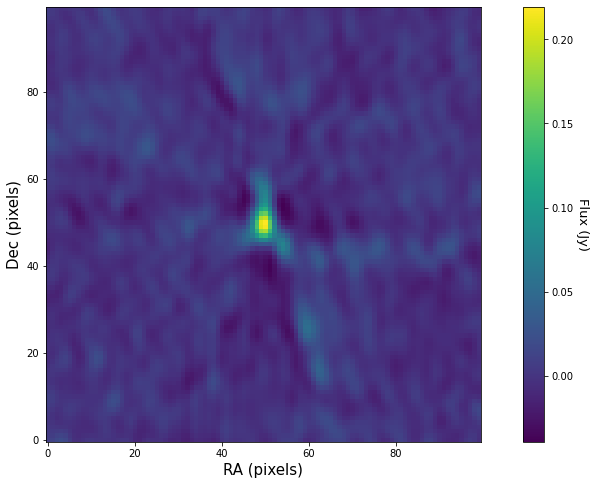

In [67]:
size =  200
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes()
plt.imshow(imvals[peakx-size//4:peakx+size//4, 
                 peaky-size//4:peaky+size//4].transpose(),
          interpolation='nearest', origin='bottom')
cbar=plt.colorbar()
cbar.set_label('Flux (Jy)', rotation=270,fontsize=13,labelpad=15)

plt.xlabel("RA (pixels)",fontsize=15)
plt.ylabel("Dec (pixels)",fontsize=15)

# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)


#plt.savefig('realfastburst1.png',dpi=360,bbox_inches='tight')

In [70]:
npixx,npixy = imvals.shape
peakx, peaky = np.where(imvals.max() == imvals)
peakx, peaky = peakx[0], peaky[0]
size = 50
peakx, peaky, size

start_pix_x = peakx-size//2
end_pix_x = peakx+size//2
start_pix_y = peaky-size//2
end_pix_y = peaky+size//2

impeak_2 = imvals[start_pix_x:end_pix_x,start_pix_y:end_pix_y]

Image shape: [4096 4096    1    1]
Peak SNR at (2245,2557) = 31.362686645492726
1 element(s) fit
{'error': {'latitude': {'unit': 'arcsec', 'value': 0.042309979113192245}, 'longitude': {'unit': 'arcsec', 'value': 0.011818263622213417}}, 'm0': {'unit': 'rad', 'value': -1.4897461538919077}, 'm1': {'unit': 'rad', 'value': -0.2709825568846416}, 'refer': 'J2000', 'type': 'direction'}
274.6438328361469 +- 0.011818263622213417"
-15.526156831153715 +- 0.042309979113192245"
Fitpeak flux: 0.22155707602451627 Jy
18h18m34.5199s -15d31m34.1646s
Residual SNR at (2249,2552) = 10.726165881336973


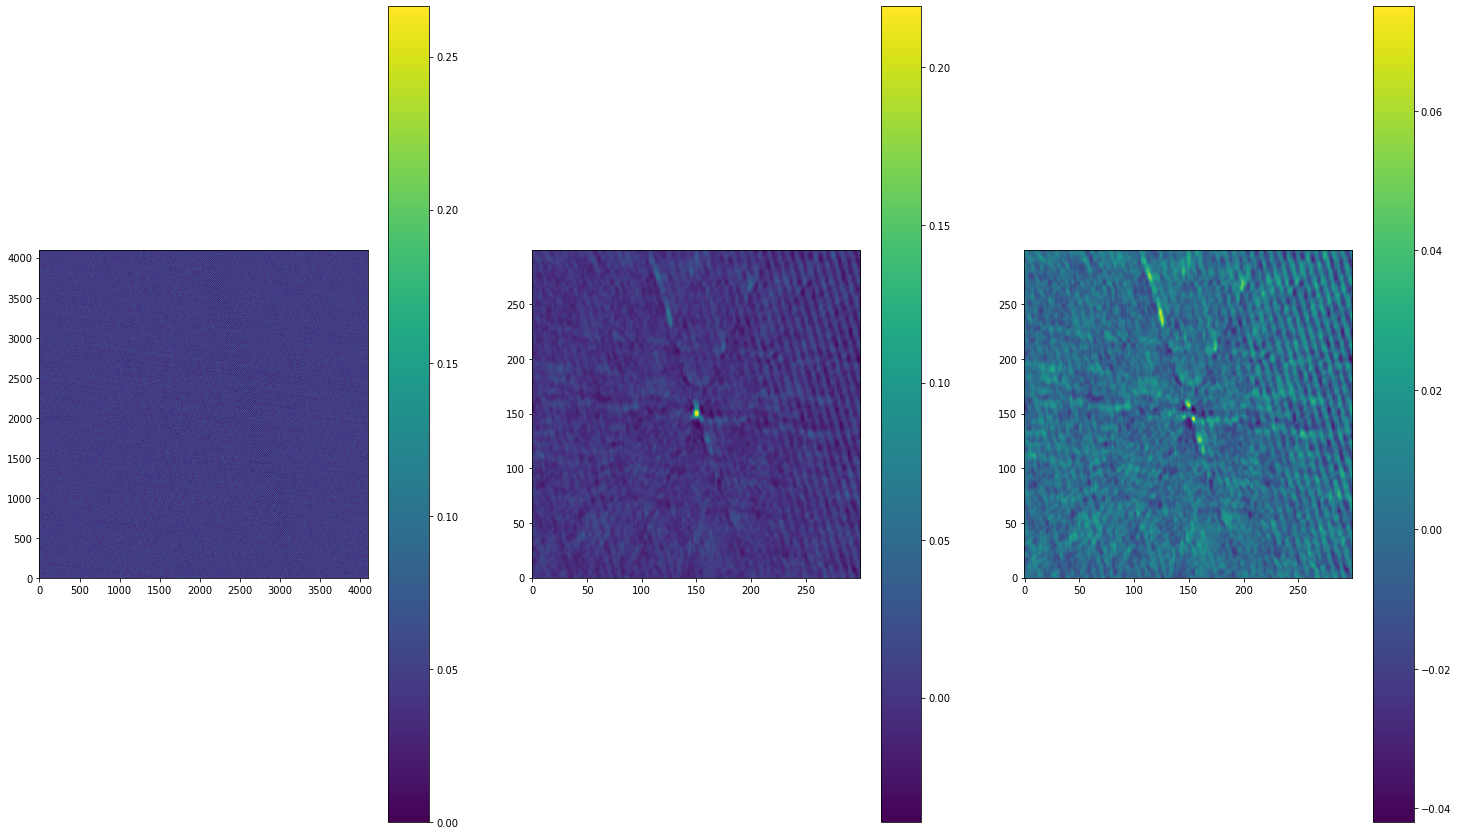

In [4]:
az, el, az_err, el_err = fitimage(f'{name}.image', outname=f'{name}.', fitwindow=50, returnimfit=True)